In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
df1 = pd.read_csv('Datasets/diabetes.csv')
df1.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [211]:
df1['Glucose'].replace(0, np.nan, inplace=True)
df1['BloodPressure'].replace(0, np.nan, inplace=True)
df1['SkinThickness'].replace(0, np.nan, inplace=True)
df1['Insulin'].replace(0, np.nan, inplace=True)
df1['BMI'].replace(0, np.nan, inplace=True)
df1['DiabetesPedigreeFunction'].replace(0, np.nan, inplace=True)
df1['Age'].replace(0, np.nan, inplace=True)

In [212]:
df1.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [213]:
df1.duplicated().any()

False

In [214]:
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [215]:

q75, q25 = np.percentile(df1['Glucose'], [75 ,25])
iqr = q75 - q25

#display interquartile range 
iqr


nan

In [216]:
def getOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    #print(col, IQR)

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #outlier_free_list = [x for x in data[col] if (
    #    (x > lower_range) & (x < upper_range))]
    #filtered_data = data.loc[data[col].isin(outlier_free_list)]
    outlier_list = [x for x in data[col] if (
        (x <= lower_range) | (x >= upper_range))]
    return outlier_list

for i in df1.columns:
    print(i, getOutliers(df1, i))


Pregnancies [15, 17, 14, 14]
Glucose []
BloodPressure []
SkinThickness []
Insulin []
BMI []
DiabetesPedigreeFunction [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
Age [69, 67, 72, 81, 67, 67, 70, 68, 69]
Outcome []


In [217]:
pregnancy_outliers = getOutliers(df1, "Pregnancies")
print(pregnancy_outliers)

[15, 17, 14, 14]


In [218]:
df1['BloodPressure'].value_counts()

70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
98.0      3
100.0     3
106.0     3
110.0     3
55.0      2
30.0      2
104.0     2
46.0      2
108.0     2
61.0      1
38.0      1
24.0      1
122.0     1
102.0     1
95.0      1
40.0      1
114.0     1
Name: BloodPressure, dtype: int64

	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

Mean - Glucose, BloodPressure, SkinThickness, BMI
Median - Insulin, DiabetesPedigreeFunction, Age

<AxesSubplot: ylabel='Frequency'>

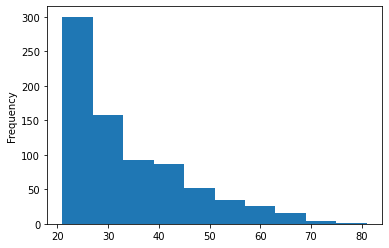

In [219]:
df1['Age'].plot.hist()

In [220]:
df1.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [221]:
df1.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [222]:
data = df1.values
X = data[:, :-1]
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [223]:
y = data[:, -1]
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [226]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [227]:
pd.DataFrame(X_train) 

,0,1,2,3,4,5,6,7
0,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40.0
1,10.0,129.0,62.0,36.0,NaN,41.2,0.441,38.0
2,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0
3,8.0,120.0,78.0,NaN,NaN,25.0,0.409,64.0
4,2.0,120.0,76.0,37.0,105.0,39.7,0.215,29.0
...,...,...,...,...,...,...,...,...
609,2.0,157.0,74.0,35.0,440.0,39.4,0.134,30.0
610,7.0,187.0,50.0,33.0,392.0,33.9,0.826,34.0
611,13.0,126.0,90.0,NaN,NaN,43.4,0.583,42.0
612,4.0,171.0,72.0,NaN,NaN,43.6,0.479,26.0


labels = Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Mean - Glucose, BloodPressure, SkinThickness, BMI (columns:1,2,3,5)

Median - Insulin, DiabetesPedigreeFunction, Age (columns:4,6,7)

In [233]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [229]:
X_train[:, (1,2,3,5)] = mean_imputer.fit_transform(X_train[:, (1,2,3,5)])
X_train[:, (4,6,7)] = median_imputer.fit_transform(X_train[:, (4,6,7)])
X_test[:, (1,2,3,5)] = mean_imputer.transform(X_test[:, (1,2,3,5)])
X_test[:, (4,6,7)] = median_imputer.transform(X_test[:, (4,6,7)])
print(X_train)

[[  9.    145.     80.    ...  37.9     0.637  40.   ]
 [ 10.    129.     62.    ...  41.2     0.441  38.   ]
 [  7.    102.     74.    ...  37.2     0.204  45.   ]
 ...
 [ 13.    126.     90.    ...  43.4     0.583  42.   ]
 [  4.    171.     72.    ...  43.6     0.479  26.   ]
 [  9.    102.     76.    ...  32.9     0.665  46.   ]]


In [231]:
pd.DataFrame(X_train).isna().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [ ]:
X_train[:, (1,2,3,5)] = min_max_scaler.fit(X_train[:, (1,2,3,5)])
X_test[:, (4,6,7)] = min_max_scaler.transform(X_test[:, (4,6,7)])